### 0. Loading dependencies

In [71]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scipy
import statsmodels.formula.api as smf
import random
from scipy.stats import iqr
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# String styling
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### 1.1 Data Preparation: Data Cleaning, Relabeling, Wrangling and splitting subset.

In [2]:
df_salary = pd.read_csv('salary.csv')
df_salary[df_salary.salary.isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [86]:
#Fill Nan values is salary column
df_salary = df_salary.fillna(df_salary.salary.mean())

#Rename as per metadata
df_salary =df_salary.rename(columns ={'male':'gender', 'experior':'Experience', 'yearsabs':'years_absent'})
df_salary.gender = ['male' if i == 1 else 'female' for i in df_salary.gender]
df_salary.position = ['Jnr_employee' if i == 1 else 'Manager' if  i == 2 else 'Executive' for i in df_salary.position]
df_salary.Field = ['Engineering' if i == 1 else 'Finance' if i == 2 else 'Human Resource' if i == 3 else 'Marketing' for i in df_salary.Field]    
df_salary = pd.DataFrame(df_salary)
df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,years_absent
0,53000.0,0,0,0,1.17,1,0,Executive,female,Marketing,0
1,58000.0,1,0,0,1.24,1,0,Executive,female,Marketing,0
2,45500.0,0,0,0,1.21,1,0,Executive,female,Marketing,2
3,35782.0,0,2,1,0.99,1,0,Executive,female,Marketing,1
4,34731.0,0,2,2,0.91,1,0,Executive,female,Marketing,1


In [4]:
#Splitting the data into df_train train and test set

#percentage split
split = len(df_salary)*0.8
print("For training set of 80%, subset must contain approximarely",round(split), 'rows')

#Columns for desired variables
df_sample = df_salary.loc[:,['salary','yearsworked','position','gender','Field','yearsrank','market','years_absent']]

#Initialise training set
df_train =  df_sample.loc[:split,:]

#initialise test set
df_test = df_sample.loc[split:,:]
df_train

For training set of 80%, subset must contain approximarely 411 rows


,salary,yearsworked,position,gender,Field,yearsrank,market,years_absent
0,53000.0,0,Jnr_employee,male,Human Resource,0,1.17,0
1,58000.0,0,Jnr_employee,male,Finance,0,1.24,0
2,45500.0,0,Jnr_employee,male,Human Resource,0,1.21,2
3,35782.0,2,Jnr_employee,male,Marketing,1,0.99,1
4,34731.0,2,Jnr_employee,male,Marketing,2,0.91,1
...,...,...,...,...,...,...,...,...
407,35000.0,0,Jnr_employee,female,Human Resource,0,0.91,4
408,36833.0,3,Jnr_employee,female,Marketing,3,0.84,1
409,31000.0,0,Jnr_employee,female,Human Resource,0,0.95,1
410,31577.0,3,Jnr_employee,female,Human Resource,2,0.86,4


### 1.2 Distribution and spread of variables

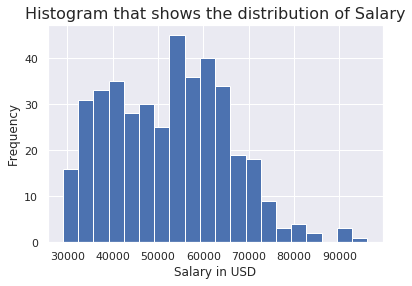

In [5]:
sns.set()
plt.hist(df_train.salary, bins=20)
plt.title('Histogram that shows the distribution of Salary', fontsize=16)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

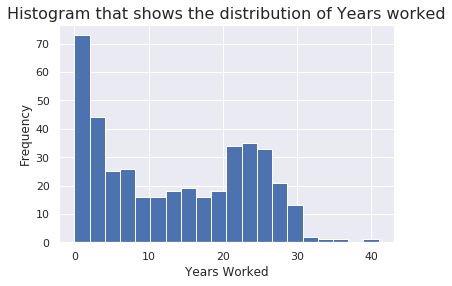

In [6]:
sns.set()
plt.hist(df_train.yearsworked, bins=20)
plt.title('Histogram that shows the distribution of Years worked', fontsize=16)
plt.xlabel('Years Worked')
plt.ylabel('Frequency')
plt.show()

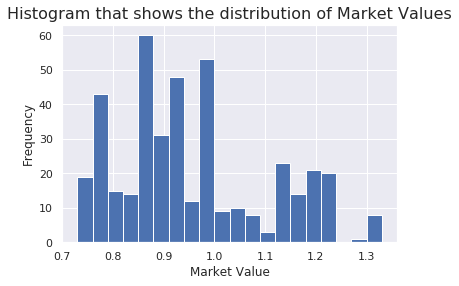

In [7]:
sns.set()
plt.hist(df_train.market, bins=20)
plt.title('Histogram that shows the distribution of Market Values', fontsize=16)
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.show()

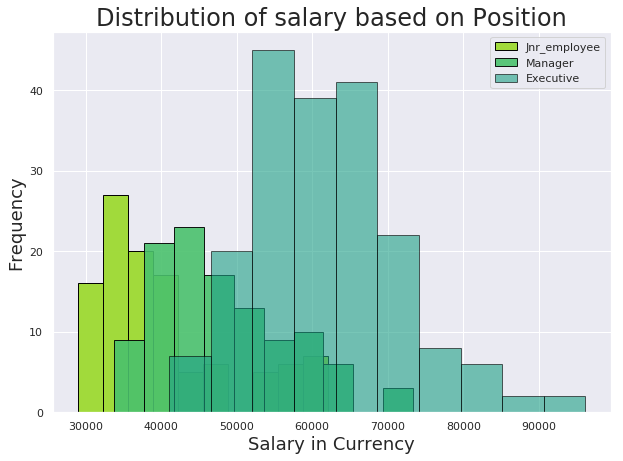

In [8]:
sns.set_palette('viridis_r')
plt.tight_layout()
df_train[df_train['position']=='Jnr_employee'].salary.plot(kind='hist',edgecolor='black',alpha=0.99,figsize=(10,7))
df_train[df_train['position']=='Manager'].salary.plot(kind='hist',edgecolor='black',alpha=0.9,figsize=(10,7))
df_train[df_train['position']=='Executive'].salary.plot(kind='hist',edgecolor='black',alpha=0.6,figsize=(10,7))
plt.legend(labels=['Jnr_employee','Manager','Executive'])
plt.title('Distribution of salary based on Position', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

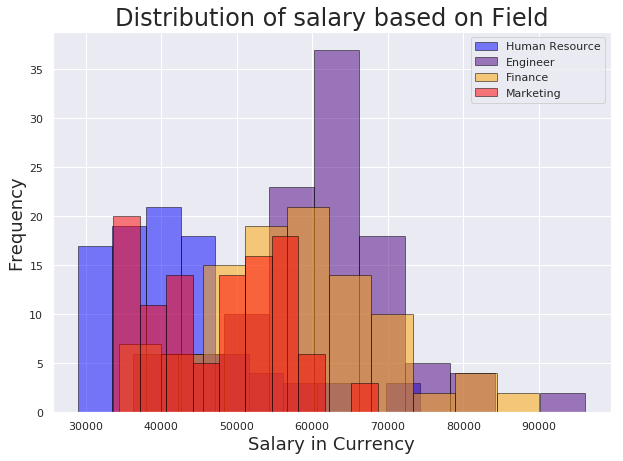

In [9]:
sns.set()
df_train[df_train['Field']=='Human Resource'].salary.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['Field']=='Engineering'].salary.plot(kind='hist',color='indigo',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['Field']=='Finance'].salary.plot(kind='hist',color='orange',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['Field']=='Marketing'].salary.plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Human Resource','Engineer','Finance','Marketing'])
plt.title('Distribution of salary based on Field', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

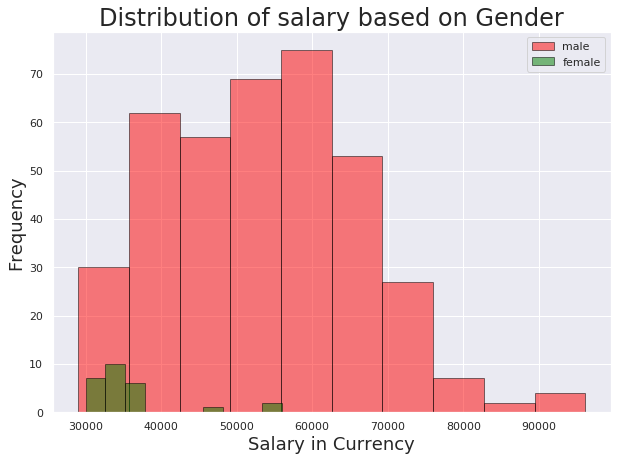

In [10]:
df_train[df_train['gender']=='male'].salary.plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['gender']=='female'].salary.plot(kind='hist',color='green',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['male','female'])
plt.title('Distribution of salary based on Gender', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

In [11]:
#df_train descriptive statistics
df_train.describe()

,salary,yearsworked,yearsrank,market,years_absent
count,412.000000,412.000000,412.000000,412.000000,412.000000
mean,52392.579408,13.555825,7.502427,0.960461,1.053398
std,13009.116542,9.855614,6.718714,0.150411,5.880568
min,29000.000000,0.000000,0.000000,0.730000,0.000000
25%,41097.750000,4.000000,2.000000,0.850000,0.000000
50%,53006.500000,13.000000,5.000000,0.920000,0.000000
75%,61542.750000,23.000000,13.000000,1.040000,1.000000
max,96156.000000,41.000000,28.000000,1.330000,118.000000


### 1.3 Scatter Plots to analyse the relaationships

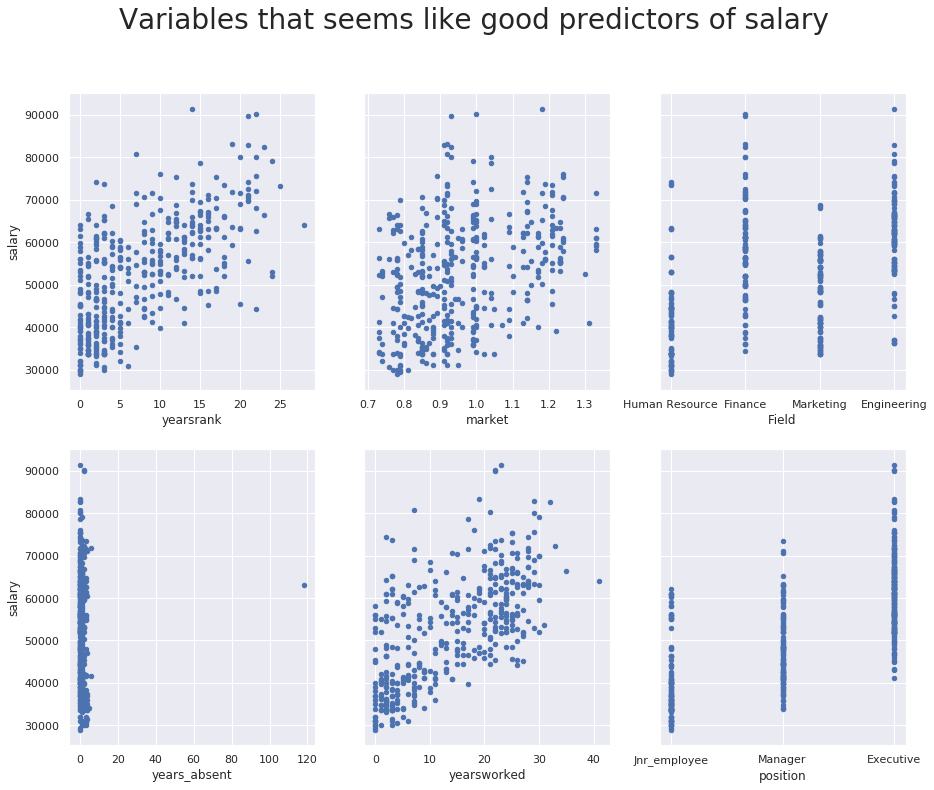

In [59]:
#Handle RGBA or RGB value warning 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Plot subplots of scatter plots of  Salary vs Other Possible Predicting Variables
sns.set()
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle('Variables that seems like good predictors of salary', fontsize=28)
df_train.plot(kind='scatter', x='yearsrank', y='salary', ax=axs[0,0],figsize=(15, 12))
df_train.plot(kind='scatter', x='market', y='salary', ax=axs[0,1])   
df_train.plot(kind='scatter', x='Field', y='salary', ax=axs[0,2])
df_train.plot(kind='scatter', x='years_absent', y='salary', ax=axs[1,0])
df_train.plot(kind='scatter', x='yearsworked', y='salary', ax=axs[1,1])
df_train.plot(kind='scatter', x='position', y='salary', ax=axs[1,2])
plt.show()

## Checking and handling outliers

In [60]:
# Quartiles and IQR:df_train
q75_train, q25_train = np.percentile(df_train['salary'], [75 ,25])
iqr_train = q75_train - q25_train

# Extremes' boundaries: df_train
lower_bound = q25_train - iqr_train*1.5
upper_bound = q75_train + iqr_train*1.5

# Quartiles and IQR:df_test
q75_test, q25_test = np.percentile(df_test['salary'], [75 ,25])
iqr_test = q75_test - q25_test

# Extremes' boundaries: df_test
test_lower_bound = q25_test - iqr_test*1.5
test_upper_bound = q75_test + iqr_test*1.5

#Determining if an entry is an extreme or an outlier:df_train
df_train['Is_it_an_extreme'] = ['Yes' if i < lower_bound else 'Yes' 
                                if i > upper_bound else "No" 
                                for i in df_train.salary]
df_outliers = df_train[df_train.Is_it_an_extreme == 'Yes']

#Determining if an entry is an extreme or an outlier:df_test
df_test['Is_it_an_extreme'] = ['Yes' if i < test_lower_bound else 'Yes'
                               if i > test_upper_bound else "No"
                               for i in df_test.salary]
df_test_outliers = df_test[df_test.Is_it_an_extreme == 'Yes']

#Dropping outliers
df_train = df_train[df_train.Is_it_an_extreme != 'Yes']
df_test = df_test[df_test.Is_it_an_extreme != 'Yes']

#df_train descriptive statistics
df_train.describe()

,salary,yearsworked,yearsrank,market,years_absent
count,411.000000,411.000000,411.000000,411.000000,411.000000
mean,52286.099066,13.559611,7.491484,0.959903,1.051095
std,12843.956214,9.867326,6.723225,0.150166,5.887549
min,29000.000000,0.000000,0.000000,0.730000,0.000000
25%,41089.500000,4.000000,2.000000,0.850000,0.000000
50%,53003.000000,13.000000,5.000000,0.920000,0.000000
75%,61446.000000,23.000000,13.000000,1.040000,1.000000
max,91405.000000,41.000000,28.000000,1.330000,118.000000


### Individual Correlation coefficient and P Values

In [87]:
#Coefficients for every variable
coeffs0 = scipy.pearsonr(df_train.salary,df_train.yearsworked)
coeffs1 = scipy.pearsonr(df_train.salary,df_train.market)
coeffs2 = scipy.pearsonr(df_train.salary,df_train.yearsrank)

#Salary vs Years worked interpretation
print(color.BOLD + color.UNDERLINE +'Salary predicted by Years worked: ' + color.END)
g = pd.Series({'Corr Coeff':coeffs0[0],'p-value':coeffs0[1],})
print(g.to_string())
print(color.BOLD + 'Therefore: Positive correlation between salary and years worked, reject null(p-value<0,05), there is a relationship.\n')

#Salary vs Market Value interpretation
print(color.BOLD + color.UNDERLINE +'Salary predicted by Market Value: ' + color.END)
g = pd.Series({'Corr Coeff':coeffs1[0],'p-value':coeffs1[1],})
print(g.to_string())
print(color.BOLD +'Therefore: Positive correlation between salary and Market Value, reject null(p-value<0,05), there is a relationship\n.' + color.END)

#Salary vs Years Rank interpretation
print(color.BOLD + color.UNDERLINE +'Salary predicted by Years Rank: ' + color.END)
g = pd.Series({'Corr Coeff':coeffs2[0],'p-value':coeffs2[1],})
print(g.to_string())
print(color.BOLD +'Therefore: Positive correlation between salary and Years Rank, reject null(p-value<0,05), there is a relationship\n.' + color.END)

Salary predicted by Years worked: 
Corr Coeff    6.444226e-01
p-value       1.336464e-49
Therefore: Positive correlation between salary and years worked, reject null(p-value<0,05), there is a relationship.

Salary predicted by Market Value: 
Corr Coeff    3.646367e-01
p-value       2.271567e-14
Therefore: Positive correlation between salary and Market Value, reject null(p-value<0,05), there is a relationship
.
Salary predicted by Years Rank: 
Corr Coeff    6.477483e-01
p-value       2.941669e-50
Therefore: Positive correlation between salary and Years Rank, reject null(p-value<0,05), there is a relationship
.


### 2. Dummy variables for Field variable with Human Resource as reference

In [17]:
df_dummies =pd.get_dummies(df_train.Field).loc[:,['Engineering','Finance']]
df_dummies

,Engineering,Finance
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
407,0,0
408,0,0
409,0,0
410,0,0


### 3. correlation matrix comparing the relationship of salary to the predictor variables

In [61]:
df_train.corr(method='pearson')
# df_train.corr(method='spearman')
# df_train.corr(method='kendall')

,salary,yearsworked,yearsrank,market,years_absent
salary,1.000000,0.644423,0.647748,0.364637,0.007308
yearsworked,0.644423,1.000000,0.821888,-0.089410,0.034899
yearsrank,0.647748,0.821888,1.000000,-0.044235,0.071949
market,0.364637,-0.089410,-0.044235,1.000000,-0.080908
years_absent,0.007308,0.034899,0.071949,-0.080908,1.000000


### Is there any multicollinearity or other problems that may be a problem in the multiple regression
 <p> Looking at the above correlation coefficients. There's is a moderarate positive relationship between salary and years worked and there's is a moderarate positive relationship between salary and years. This shows multicollinearity. Given, a function that assess salary as a function:</p>

   **Y’ = B0 + B1X1 + B2X2 + ei for i = 1,2, ... n.**  where:

*  **Y'** : Is the predicted dependent variable salary
*  **B0** : Is the intercept of the regression line
* **X1**: Predicting independent variable: Years worked
* **B1**: Is the marginal effect on salary of one additional year worked, holding other variables constant.
* **X2**: Predicting independent variable: Years rank
* **B2**: Is the marginal effect on salary of one additional year ranked, holding other variables constant.
* **ei** : Is the standard deviations of the model

What the regression model is going to do is to disentangle the individual effects of years worked and years rank on salary. Given the opportunity that the regression model does tease apart these individual effects, such individual effects become obscured. Multicolinearity happens when the X variables are themselves related.

This is a perfect description for multicolinearity, if **one year a experience is added**, the likelihood that one stays in that **rank for one more year** is close to 100%, similarly with **market value**, it is common knowledge that yeats of experience do actually increase the market value of an individual, so the regression model will have a very unrealistic way of analysing if the effect on salary was due to an increase in market value or due to one more year of experience or one more year of being in that particular rank.


## Model creation of salary prediction based on multivariables

In [88]:
import statsmodels.formula.api as smf
# create a fitted model: salary vs Years worked _ Market + Years Rank
model= smf.ols(formula='salary ~ yearsworked + market + yearsrank', data=df_train).fit()
model.params

Intercept       6161.917625
yearsworked      537.987238
market         35583.941549
yearsrank        623.663206
dtype: float64

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     230.5
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           2.26e-87
Time:                        11:13:38   Log-Likelihood:                -4267.0
No. Observations:                 411   AIC:                             8542.
Df Residuals:                     407   BIC:                             8558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6161.9176   2622.780      2.349      0.019    1006.032    1.13e+04
yearsworked   537.9872     69.244      7.769      0.000     401.867     674.107
market       3.558e+04   2594.424     13.716      0.000    3.05e+04    4.07e+04
yearsrank     623.6632    101.317      6.156      0.000     424.492     822.834
==============================================================================
Omnibus:                       56.699   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.818
Skew:                           0.810   Prob(JB):                     1.28e-22
Kurtosis:                       4.807   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept    43015.766253
yearsrank     1237.449427
dtype: float64

,0,1
Intercept,41592.496690,44439.035816
yearsrank,1095.978686,1378.920168


Intercept    22348.597207
market       31188.059440
dtype: float64

,0,1
Intercept,14827.418624,29869.775791
market,23446.631803,38929.487077


"The mean salary is 52286.09906624777, these models' slopes and intercepts explains why they both are good predictors of salary"

### Predictions`

In [29]:
df_train

,salary,yearsworked,position,gender,Field,yearsrank,market,years_absent,Is_it_an_extreme
0,53000.0,0,Jnr_employee,male,Human Resource,0,1.17,0,No
1,58000.0,0,Jnr_employee,male,Finance,0,1.24,0,No
2,45500.0,0,Jnr_employee,male,Human Resource,0,1.21,2,No
3,35782.0,2,Jnr_employee,male,Marketing,1,0.99,1,No
4,34731.0,2,Jnr_employee,male,Marketing,2,0.91,1,No
...,...,...,...,...,...,...,...,...,...
407,35000.0,0,Jnr_employee,female,Human Resource,0,0.91,4,No
408,36833.0,3,Jnr_employee,female,Marketing,3,0.84,1,No
409,31000.0,0,Jnr_employee,female,Human Resource,0,0.95,1,No
410,31577.0,3,Jnr_employee,female,Human Resource,2,0.86,4,No


In [30]:
#predictsalary of  the average of years worked
x = pd.DataFrame({'yearsworked':[13.559611]})
model.predict(x)

0    52286.099313
dtype: float64

In [31]:
#predict salary of the max years worked
x1 = pd.DataFrame({'yearsworked':[41]})
model.predict(x1)

0    75303.715236
dtype: float64

In [32]:
#predict salary of the average of years rank
y1 = pd.DataFrame({'yearsrank':[7.491484]})
model1.predict(y1)

0    52286.098837
dtype: float64

In [33]:
#predict salary of the max years ranked
y2 = pd.DataFrame({'yearsrank':[28]})
model1.predict(y2)

0    77664.350214
dtype: float64

In [34]:
#predict salary of the average market value
b1 = pd.DataFrame({'market':[0.959903]})
model2.predict(b1)

0    52286.109028
dtype: float64

In [35]:
#predict salary of the max market value
b2 = pd.DataFrame({'market':[1.330000]})
model2.predict(b2)

0    63828.716263
dtype: float64

### Examine the training data for Extreme Values

### Standardising residuals for the train set: model_Years Worked

In [36]:
from math import sqrt
#model1: predict salary using years worked
df_train1 = model.predict(df_train)
df_train1 = pd.DataFrame(df_train1)

#Mapping 2 columns: Observed salary together with Predicted salary
df_train1['Actual Salary'] = df_train['salary']
df_train1= df_train1.rename(columns={0:'Predicted Salary'})
df_train1['Actual Salary'] = df_train1['Actual Salary'].astype(float)
df_train1['Predicted Salary'] = df_train1['Predicted Salary'].astype(float)

#Creating a residual column( a residual vertical distance between a data point and the regression line)
df_train1['Residual'] = (df_train1['Actual Salary'] - df_train1['Predicted Salary'])

#calculating the RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual1 = df_train1['Actual Salary']
y_predicted1 = df_train1['Predicted Salary']
rmse_train = sqrt(mean_squared_error(y_actual1,y_predicted1))
rmse_test = sqrt(mean_squared_error(y_actual1,y_predicted1))

#standardizing residuals
#Standardized residual = (observed count – expected count) / √expected count
df_train1['Standardised Residuals'] = df_train1.Residual/rmse_train
df_train1

,Predicted Salary,Actual Salary,Residual,Standardised Residuals
0,40911.992406,53000.0,12088.007594,1.232285
1,40911.992406,58000.0,17088.007594,1.741999
2,40911.992406,45500.0,4588.007594,0.467714
3,42589.637422,35782.0,-6807.637422,-0.693989
4,42589.637422,34731.0,-7858.637422,-0.801131
...,...,...,...,...
407,40911.992406,35000.0,-5911.992406,-0.602685
408,43428.459930,36833.0,-6595.459930,-0.672359
409,40911.992406,31000.0,-9911.992406,-1.010456
410,43428.459930,31577.0,-11851.459930,-1.208170


In [37]:
### Standardising residuals for the test set: model_Years Worked

In [38]:
from math import sqrt

#model1: predict salary using years worked
df_test1 = model.predict(df_test)
df_test1 = pd.DataFrame(df_test1)

#Mapping 2 columns: Observed salary together with Predicted salary
df_test1['Actual Salary'] = df_test['salary']
df_test1= df_test1.rename(columns={0:'Predicted Salary'})
df_test1['Actual Salary'] = df_test1['Actual Salary'].astype(float)
df_test1['Predicted Salary'] = df_test1['Predicted Salary'].astype(float)

#Creating a residual column( a residual vertical distance between a data point and the regression line)
df_test1['Residual'] = (df_test1['Actual Salary'] - df_test1['Predicted Salary'])

#calculating the RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual1 = df_test1['Actual Salary']
y_predicted1 = df_test1['Predicted Salary']


#standardizing residuals
#Standardized residual = (observed count – expected count) / √expected count
df_test1['Standardised Residuals'] = df_test1.Residual/rmse_test

df_test1

,Predicted Salary,Actual Salary,Residual,Standardised Residuals
412,44267.282438,35574.0,-8693.282438,-0.886217
413,40911.992406,59000.0,18088.007594,1.843941
414,43428.459930,47344.0,3915.540070,0.399161
415,43428.459930,35000.0,-8428.459930,-0.859220
416,43428.459930,40000.0,-3428.459930,-0.349507
...,...,...,...,...
509,55171.975043,45906.0,-9265.975043,-0.944599
510,56849.620059,60402.0,3552.379941,0.362139
511,46783.749962,53187.0,6403.250038,0.652765
512,57688.442567,56542.0,-1146.442567,-0.116872


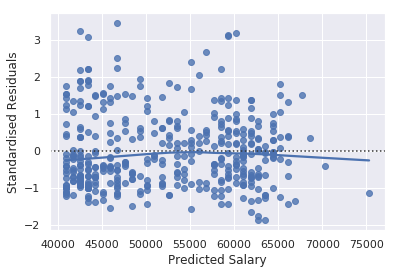

In [49]:
sns.residplot(df_train1['Predicted Salary'],df_train1['Standardised Residuals'], lowess= True)

In [40]:
df_test1 = model.predict(df_test)
df_test1 = pd.DataFrame(df_test1)
df_test1 = df_test1.rename(columns={0:'Predicted Salary'})
df_test1['Actual Salary'] = df_test['salary']
df_test1 

,Predicted Salary,Actual Salary
412,44267.282438,35574.0
413,40911.992406,59000.0
414,43428.459930,47344.0
415,43428.459930,35000.0
416,43428.459930,40000.0
...,...,...
509,55171.975043,45906.0
510,56849.620059,60402.0
511,46783.749962,53187.0
512,57688.442567,56542.0


In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = df_train1['Actual Salary']
y_predicted = df_train1['Predicted Salary']
y_actual1 = df_test1['Actual Salary']
y_predicted1 = df_test1['Predicted Salary']
rms_test = mean_squared_error(y_actual1,y_predicted1)
rms_train = mean_squared_error(y_actual,y_predicted)
rmse_test =sqrt(rms_test )
rmse_train = sqrt(rms_train)
print('The RMSE of the train data is: ',rmse_train)

print('And The RMSE of the test data is: ',rmse_test,'which shows little to no signs of underfitting')

The RMSE of the train data is:  9809.427209664767
And The RMSE of the test data is:  9414.115949054514 which shows little to no signs of underfitting


In [42]:
import statsmodels.api as sm

#Fit linear model to any dataset
model = sm.OLS(df_train['yearsworked'],df_train.salary)
#create instance of influence
results = model.fit()
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag



#standardized residuals
standardized_residuals = pd.DataFrame(influence.resid_studentized_internal)
standardized_residuals = standardized_residuals.rename(columns=({0:'Standardised Residuals'}))
standardized_residuals

,Standardised Residuals
0,-1.787007
1,-1.956049
2,-1.533652
3,-0.958584
4,-0.923141
...,...
406,-1.179313
407,-0.870472
408,-1.044419
409,-0.693258


In [43]:
# #Standardized residual = (observed count – expected count) / √expected count
# # df_train1_ = df_train1
# df_train1['Standardised Residuals'] = df_train1["Residuals"]/sqrt(df_train1['Predicted Salary'])
# df_train1
# # from sklearn.metrics import mean_squared_error
# # from math import sqrt
# # y_actual1 = df_test1['Actual Salary']
# # y_predicted1 = df_test1['Predicted Salary']
# # rms_test = sqrt(mean_squared_error(y_actual1,y_predicted1))
# # rms_train = sqrt(mean_squared_error(y_actual1,y_predicted1))


In [44]:
# sns.set()
# sns.residplot(df_train1_['Standardised Residuals'], df_train1_['Predicted Salary'],  lowess=False, )
# plt.show()

The train and test sets have 1 outlier each and thus they were dropped. 

#### Below is a summary statistics showing the statistics for every column in the data frame




### 1.3 Histograms to show the distribution between salary and other variables 

### 1.4 Scatterplot showing the relationship between Years Worked and Salary

### 2.  Using the statsmodels package and the training data, run a simple linear regression for Salary

**R > 0.6** Means there is a positive correlation between the variables

**R > 0.6** A moderate positive relationship

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.

The **p_value** is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the *threshold* of the *P_value* of **p= 0.05**.

### 3. Meaning of a confidence interval

**From this, we can deduce that the true coefficient value of the salary population, will between these intervals. Simply put, if thousands of samples from a population was formed, this condition will hold 95% of the time.**

**This is a common shorthand for the idea that the calculations “work” 95% of the time. Only 5 % will this be not the case**

### 5. Calculate the expected salary for someone with 12 and 80 years’ work experience.

In [45]:
f'Maximum years worked(in numbers) %s' %df_salary.yearsworked.max()

'Maximum years worked(in numbers) 41'

As per the model, it predicts that person who has worked for 12 years will earn, on average, the salary above. This value is interesting because the salary is not far off from the mean. This is because the mean for years worked is just over 12 years, meaning, on average, an employee at this company is to be expected to have worked for 12 years.

Yes there also seem to be a problem, the model predicts the salary level that is bigger than the maximum salary in the data set. The model assumes that people can work indefinetly and hence the prediction, in reality, rarely does a person spend 80 years in the workforce. Even in the data set the person who have worked longer than the rest only worked for 41 years.

### 7. What other employee characteristics might influence their salary

In [46]:
df_salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,years_absent
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.167068
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.029311
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,-0.017639
years_absent,-0.069622,0.132380,0.055468,0.035632,-0.167068,0.029311,-0.017639,1.000000


 This is how others are correlated with salary:

1. **Rank on salary**
Moderate positive correlation
2. **Experience**
Very Weak positive correlation
3. **Market**
Weak Positive correlation
4. **Degree**
5. Very weak positive correlation
6. **Other Qualification**
7. Ver weak positive correlation
8. **Years absent**
Negative correlation

In [47]:
print('Below is the OLS regressionn summary:')
model1.summary()


Below is the OLS regressionn summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     295.7
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           2.94e-50
Time:                        09:35:43   Log-Likelihood:                -4359.2
No. Observations:                 411   AIC:                             8722.
Df Residuals:                     409   BIC:                             8730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.302e+04    724.022     59.412      0.000    4.16e+04    4.44e+04
yearsrank   1237.4494     71.967     17.195      0.000    1095.979    1378.920
==============================================================================
Omnibus:                        8.679   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.972
Skew:                           0.352   Prob(JB):                       0.0113
Kurtosis:                       2.829   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 8. How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?


In [48]:
df_train_comp = model.predict(df_train)
df_train_comp = pd.DataFrame(df_train_comp)
df_train_comp.rename(columns={0:'Predicted','salary':'Actual'})
df_train_comp['salary'] = df_train['salary']

ValueError: shapes (411,1) and (411,9) not aligned: 1 (dim 1) != 411 (dim 0)

In [ ]:
df_train_comp = df_train_comp.loc[:,['salary',0]]
df_train_comp.rename(columns={0:'Predicted'})
y_actual = df_train_comp.salary
y_predicted = df_train_comp[0]
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_train = sqrt(mean_squared_error(y_actual,y_predicted))


In [ ]:
df_test_comp = model.predict(df_test)
df_test_comp = pd.DataFrame(df_test_comp)
df_test_comp.rename(columns={0:'Predicted'})
df_test_comp['salary'] = df_test['salary']
df_test_comp = df_test_comp.dropna()

In [ ]:
df_test_comp = df_test_comp.loc[:,['salary',0]]
df_test_comp.rename(columns={0:'Predicted', 'salary':'Actual'})
df_test.salary.fillna(df_test.salary.mean())
y_actual1 = df_test_comp.salary
y_predicted1 = df_test_comp[0]
rms_test = sqrt(mean_squared_error(y_actual1,y_predicted1))
rms_train = sqrt(mean_squared_error(y_actual,y_predicted))


In [ ]:
print('The RMSE of the train data is: ',rms_train)
print('And The RMSE of the test data is: ',rms_test,'which shows little to no signs of underfitting')

In [ ]:
df_train.describe()

In [ ]:
roa = sqrt((((df_train1['Actual Salary']-df_train1['Predicted Salary'])**2)/(len(df_train1)-1)))